# Run this cell first

In [1]:
# @title
# this code enables the automated feedback. If you remove this, you won't get any feedback
# so don't delete this cell!
try:
  import AutoFeedback
except (ModuleNotFoundError, ImportError):
  %pip install AutoFeedback
  import AutoFeedback

try:
  from testsrc import test_main
except (ModuleNotFoundError, ImportError):
  %pip install "git+https://github.com/autofeedback-exercises/exercises.git#subdirectory=POP_SUMMER_SCHOOL/Final-plotting-exercise"
  from testsrc import test_main

def runtest(tlist):
  import unittest
  from contextlib import redirect_stderr
  from os import devnull
  with redirect_stderr(open(devnull, 'w')):
    suite = unittest.TestSuite()
    for tname in tlist:
      suite.addTest(eval(f"test_main.UnitTests.{tname}"))
    runner = unittest.TextTestRunner()
    try:
      runner.run(suite)
    except AssertionError:
      pass

  Cloning https://github.com/autofeedback-exercises/exercises.git to /tmp/pip-req-build-f9lvbku2
  Running command git clone --filter=blob:none --quiet https://github.com/autofeedback-exercises/exercises.git /tmp/pip-req-build-f9lvbku2
  Resolved https://github.com/autofeedback-exercises/exercises.git to commit 92062353e496957327104b23a6a42ebf7e6d10aa
  Preparing metadata (setup.py) ... done
  Created wheel for testsrc: filename=testsrc-1.0-py3-none-any.whl size=2160 sha256=2a7047f8073d4f035d1cc1f0d1e3a6cc1acee76facf334c503fcd20da0179c2b
  Stored in directory: /tmp/pip-ephem-wheel-cache-vkm1mvb2/wheels/6d/19/2c/b383895d40d15d6628877026efa0f2f15e1722cbc1de1d1a0d
Successfully built testsrc


# Introduction

The exercises in this notebook are designed to accompany the quiz on travelling on the moon. As you saw in the last of these exercises you can use, python to help you with your homework.

You need to start by executing the following cell, which imports the libraries that we need.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1

The notes on temperatures at different lattitudes on the moon have finally brought us to the following equation for the temperature on the moon:

$$
(1-\alpha)\frac{S_0}{d^2}\cos(\lambda)\cos(15(t-12)) = \epsilon \sigma T^4
$$

In this expression, $\sigma$ is the Stefan-Boltzmann constant which has a value of $5.67 \times 10^{-8}$ W m$^{-2}$ K$^{-4}$, $\alpha$ is the albedo, $\epsilon$ is the emissivity.  For the moon the values of these constants are:

$$
\alpha = 0.12 \qquad \textrm{and} \qquad \epsilon=0.98
$$

For the moon, we can also assume that $\frac{S_0}{d^2} = 1361$ W/m$^2$.

By rearranging the expression above and inserting these constants we can thus derive an expression for the temperature on the moon as a function of:

* $t$ - the time of day
* $\lambda$ - The lattitude on the moon

Your task for this first exercise is to write a function called `moon_temperature` that takes in the two arguments above and that returns the temperature at the temperature on the moon at that time of day and at the lattitude specified.  The first argument to your function should be the time of day and the second argument should be the lattitude.

You should be able to use this function to answer question 1 on the quiz.



In [41]:
import numpy as np
def moon_temperature( t, lambda_ ) :
  sigma = 5.67e-8
  alpha = 0.12
  epsilon = 0.98
  S0_over_d2 = 1361
  temperature =  (((1-alpha) * S0_over_d2 * np.cos(np.deg2rad(lambda_)) * np.cos(np.deg2rad(15 * (t-12))))/ (epsilon * sigma)) ** 0.25
  return temperature

In [42]:
runtest(["test_ex1"])

Function, moon_temperature is correct!              




## Exercise 2

Lets now suppose that there is a base at a lattitude of 30 degrees.  Can you use the function from the previous section that shows how the temperature at this location changes over the course of a Lunar Day that starts at 07:00 and finishes at 17:00. You should calculate the temperature on every hour of that day. You will thus need to create a NumPy array that contains all the integers that are greater than or equal to 7 and less than or equal to 17.

Once you have created this NumPy array you will use the formulas (or the function) from the previous exerecise to create a second NumPy array that contains the temperatures at each of those times of day.
You should then be able to plot a graph that has the temperatures on the y-axis and the times of day on the x-axis. The axes on this graph should be labelled. The x-axis label will be "time of day", the y-axis label will be "Temperature at lattitude of 30 degrees / K."

In [38]:
# Your code goes here
import numpy as np
import matplotlib.pyplot as plt

t = time
def moon_temperature( t, lambda_ ) :
  sigma = 5.67e-8
  alpha = 0.12
  epsilon = 0.98
  S0_over_d2 = 1361

time_angle = np.deg2rad(15 * (t-12))
temperature = ( (1-alpha) * S0_over_d2 * np.cos(np.deg2rad(lambda_)) * np.cos(time_angle)) / (epsilon * sigma) ** 0.25

times = np.arange(7, 18)
latitude = 30
temperatures = [moon_temperature(t, latitude) for t in times]

plt.plot(times, temperatures)
plt.xlabel("Time of day")
plt.ylabel("Temperature at lattitude of 30 degrees / K.")
plt.title("Temperature at lattitude of 30 degrees")
plt.title( "Temperature Variation on the moon")
plt.grid(True)





# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()

NameError: name 'alpha' is not defined

In [28]:
runtest(["test_ex2"])

The y-coordinates of the points in the data set
'' are incorrect

       The instructions in the README file explain the specific values
       for the coordinates of the points in your graph.
       Make sure you have read those instructions carefully and that you
       know what the coordinates of the points in your graph should be



## Exercise 3

Lets now suppose that we have a set of instruments for measuring the temperature of the at 10 degree intervals of lattitude.  In other words, we are measuring the temperature at lattitudes of 0, 10, 20, 30, 40, 50, 60, 70, 80, and 90 degrees.

Suppose that we use these instruments to measure the temperaure at all these lattitudes at 10:00.  Can you use the model above to calculate the temperatures at all these lattitudes at this time so that we can compare the model with the results from our instruments.

Draw a graph that shows the 10 results from your calculation.  The x-axis label should be "latitude / degrees" the y-axis label should be "Temperature at 10:00 / K".

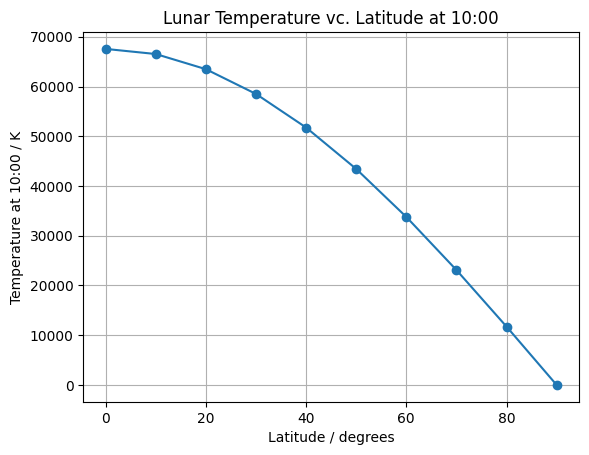

In [30]:
# Your code goes here
import numpy as np
import matplotlib.pyplot as plt

lattitudes = np.arange(0, 91, 10)
time = 10
temperatures = [moon_temperature(time, lat) for lat in lattitudes]

plt.plot(lattitudes, temperatures, marker='o')
plt.xlabel("Latitude / degrees")
plt.ylabel("Temperature at 10:00 / K")
plt.title("Lunar Temperature vc. Latitude at 10:00")
plt.grid(True)



# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()


In [31]:
runtest(["test_ex3"])

The y-coordinates of the points in the data set
'' are incorrect

       The instructions in the README file explain the specific values
       for the coordinates of the points in your graph.
       Make sure you have read those instructions carefully and that you
       know what the coordinates of the points in your graph should be



## Exercise 4

Let's now suppose that we undertake a journey on the moon.  At the start of this journey we are at lattitude `initial_lattitude` and the time is `start_time`.  The journey takes `duration` lunar hours to complete and ends in `final_latitude`.  Can you write a function called `temperature_change` that takes these four parameters in input and that returns the difference in the temperature at the start and end of our journey.

_HINT: You should include two calls to the `moon_temperature` function that you wrote for exercise 1 in the new function you are writing for this exercise._

You should be able to use this function to answer question 2 on the quiz.

In [ ]:
def temperature_change( initial_latitude, start_time, duration, final_latitude ) :

In [ ]:
runtest(["test_ex4"])

## Exercise 5

Suppose that you take a journey on the moon that takes you along a line of longitude so that your lattitude will not change.  Does the model above tell us that the temperature changes as you move?

It is tempting to say no in answer to this question as the model tells us that the temperature only depends on the lattitude and that it does not depend on the longitude.  Importantly, however, in giving this answer you are assuming that the journey takes zero time.  In other words, you are assuming that you travel instantaneously from point A to point B.  This type of instantaneous travel is not possible.  The journey will take a finite time and the temperature will thus change because the model tells us that the temperature at a particular lattitude depends upon the time of day.

You task in this exercise is thus to consider a journey on the moon along the 25 degree lattitude.  This journey starts at 7:00 and takes 11 lunar hours.  Plot a graph that shows how the temperature changes over the course of this journey.

In drawing this graph you should plot points that show the temperature at 7:00, 8:00, 9:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00 and 17:00 lunar time.  You can then draw a line between these points.  The x-axis label should be "time / lunar hours" and the y-axis label should be "temperature at latitude 25 degrees / Kelvin".

In [ ]:
# Your code goes here








# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()


In [ ]:
runtest(["test_ex5"])

## Exercise 6

Lets now suppose that you take a journey on the moon from the equator (lattitude 90 degrees) to lattitude 35 degrees. You start this journey at 07:00 lunar time and it takes 11 hours.  You are thus travelling at a speed of 5 degrees per lunar hour.  Use the cell below to draw a graph that shows how the temperature changes over the course of this journey.

As in the exercise above, in drawing this graph you should plot points that show the temperature at 7:00, 8:00, 9:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00 and 17:00 lunar time. You can then draw a line between these points. Importantly, however, you will be at a different lattitude at each of those times as you undertake this new journey.  

The x-axis label for your graph should be "time / lunar hours" and the y-axis label should be "temperature / K".

In [ ]:
# Your code goes here








# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()


In [ ]:
runtest(["test_ex6"])

## Exercise 7

This final exercise is your chance to combine everything that you have learned during this course.  I want you to make a graph showing how the temperature changes during the course of a journey along the moon.  

Once you have completed your graph, I would like you to insert it into  a short report that describes the journey that you chose to study. The quiz contains a question that allows you to submit your report.

There is plenty of scope for creativity here.  For example, you could:

* Have the transport travel at different speeds at different times.  
* Have part of the journey with travel parallel to a particular longitude direction and other parts with travel parallel to a particular lattitude.
* Have parts of the journey where the transport is accelerating/decelerating rather than travelling at a constant speed as was assumed in the previous examples.

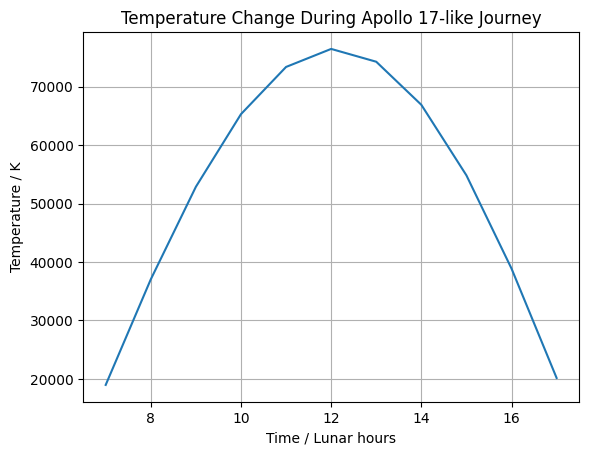

In [29]:
# prompt: Create a graph showing the temperature changes during the course of a journey of the apollo 17 mission along the moon.

import matplotlib.pyplot as plt
import numpy as np

def moon_temperature(t, lambda_):
  sigma = 5.67e-8
  alpha = 0.12
  epsilon = 0.98
  S0_over_d2 = 1361
  temperature = ((1 - alpha) * S0_over_d2 * np.cos(np.deg2rad(lambda_)) * np.cos(np.deg2rad(15 * (t - 12)))) / (epsilon * sigma) ** 0.25
  return temperature

# Example journey: Apollo 17 landing site
#  (This is just an example; you can customize the journey.)
start_time = 7  # Lunar hours
end_time = 17  # Lunar hours
times = np.arange(start_time, end_time + 1)

# Simulate a journey with varying latitude
initial_latitude = 20
final_latitude = 3  # Apollo 17 landing site is near 3°S
latitude_change = (final_latitude - initial_latitude) / (len(times) - 1)
latitudes = [initial_latitude + i * latitude_change for i in range(len(times))]

temperatures = [moon_temperature(t, lat) for t, lat in zip(times, latitudes)]


plt.plot(times, temperatures)
plt.xlabel("Time / Lunar hours")
plt.ylabel("Temperature / K")
plt.title("Temperature Change During Apollo 17-like Journey")
plt.grid(True)
plt.show()
